![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to Machine Learning II](3_0_0_Intro_ML_2.ipynb)

# Exercise 2 - The Titanic Dataset

In this exercise we are going to put in practice what we have learnt in the notebooks of the session. 

In the previous notebook we have been applying the SVM machine learning algorithm.

Your task is to apply other machine learning algorithms (at least 2) that you have seen in theory or others you are interested in.

You should compare the algorithms and describe your experiments.

I will use an KNN and a decision tree for this task


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
%run plot_learning_curve

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv")

df['Sex'].fillna('male', inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna('S', inplace=True)


df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2
df['Age'] = df['Age'].fillna(df['Age'].median())
df.drop(['Cabin', 'Name','Ticket' ], axis=1, inplace=True)

df = df.astype(np.int64)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,0
1,2,1,1,1,38,1,0,71,1
2,3,1,3,1,26,0,0,7,0
3,4,1,1,1,35,1,0,53,0
4,5,0,3,0,35,0,0,8,0


Las características y el tamñao del sata test es elegido

In [8]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features].values
y = df['Survived'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


# KNN

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pandas import Series 
from pandas import DataFrame
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
%run plot_learning_curve

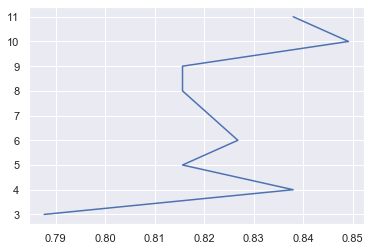

In [55]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(3, 12)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(X_train, y_train)
    y_test_pred = m.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(accuracy, k_range)


In [56]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
accuracy=metrics.accuracy_score(y_train, y_train_pred)
print (accuracy)

0.8426966292134831


In [57]:
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[103  14]
 [ 15  47]]


In [51]:

model = Pipeline([
        ('standarize', StandardScaler()),
        ('kNN', KNeighborsClassifier(n_neighbors=7))
])

crossv = KFold(5, shuffle=True, random_state=24)

resultado = cross_val_score(model, X, y, cv=crossv)
print(resultado)

[0.82122905 0.80898876 0.80898876 0.83707865 0.78651685]


# Decision Tree Classifier

In [27]:
standarize = preprocessing.StandardScaler().fit(X_train)
X_train = standarize.transform(X_train)
X_test = standarize.transform(X_test)
print(X_test)
print(X_train)

[[ 0.8282276  -0.74470474 -0.11561938 ... -0.48395055  0.44687947
  -0.55964499]
 [-1.56405658  1.34281406  1.41593406 ... -0.48395055  0.12140687
   1.02787387]
 [ 0.8282276  -0.74470474  0.19069131 ... -0.48395055 -0.33808386
  -0.55964499]
 ...
 [-0.36791449  1.34281406  2.10513311 ... -0.48395055 -0.43381109
  -0.55964499]
 [ 0.8282276  -0.74470474 -0.03904171 ... -0.48395055 -0.49124743
  -0.55964499]
 [ 0.8282276   1.34281406 -0.8813961  ... -0.48395055 -0.51039288
   2.61539274]]
[[ 0.8282276   1.34281406 -0.95797377 ...  1.99499039 -0.49124743
  -0.55964499]
 [ 0.8282276  -0.74470474 -0.03904171 ... -0.48395055 -0.16577483
   2.61539274]
 [-0.36791449 -0.74470474  0.34384665 ... -0.48395055 -0.37637475
  -0.55964499]
 ...
 [-0.36791449 -0.74470474 -0.34535239 ... -0.48395055 -0.37637475
  -0.55964499]
 [ 0.8282276   1.34281406 -0.80481843 ... -0.48395055 -0.49124743
  -0.55964499]
 [-0.36791449 -0.74470474  0.03753597 ... -0.48395055 -0.37637475
  -0.55964499]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
param_grid = {'max_depth': np.arange(3, 10)} 

gs = GridSearchCV(DecisionTreeClassifier(), param_grid)

gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
      

In [30]:
gs.best_score_

0.8145572737122032

In [34]:
max_leaf_nodes=9
criterion='entropy'
splitter='random'
class_weight=None
max_depth=5
random_state=2


In [35]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion=criterion, 
                                      splitter=splitter, class_weight=class_weight, max_depth=9, random_state=random_state)

model.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='random')

In [39]:
y_train_pred = model.predict(X_train)
accuracy =metrics.accuracy_score(y_train, y_train_pred)
print (accuracy)

0.797752808988764


In [41]:
#Confusion matrix
print(metrics.confusion_matrix(y_test, y_test_pred))

[[102  15]
 [ 29  33]]


In [52]:
model = Pipeline([
        ('standarize', StandardScaler()),
        ('DecisionTree', DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion=criterion, 
                                      splitter=splitter, class_weight=class_weight, max_depth=9, random_state=random_state))

])

crossv = KFold(5, shuffle=True, random_state=24)

resultado = cross_val_score(model, X, y, cv=crossv)
print(resultado)

[0.84357542 0.74719101 0.78089888 0.78651685 0.73595506]


## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.